In [2]:
!pip install skimpy

     |████████████████████████████████| 1.0 MB 31.4 MB/s 
     |████████████████████████████████| 11.3 MB 60.8 MB/s 
     |████████████████████████████████| 97 kB 6.5 MB/s 
     |████████████████████████████████| 211 kB 67.7 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages th

In [1]:
import pandas as pd
import numpy as np
from skimpy import skim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
dados = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
dados.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
skim(dados)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 344    │ │ float64     │ 4     │                                    │
│ │ Number of columns │ 7      │ │ object      │ 3     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

In [ ]:
dados.dropna(inplace=True)
dados.species_short.value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

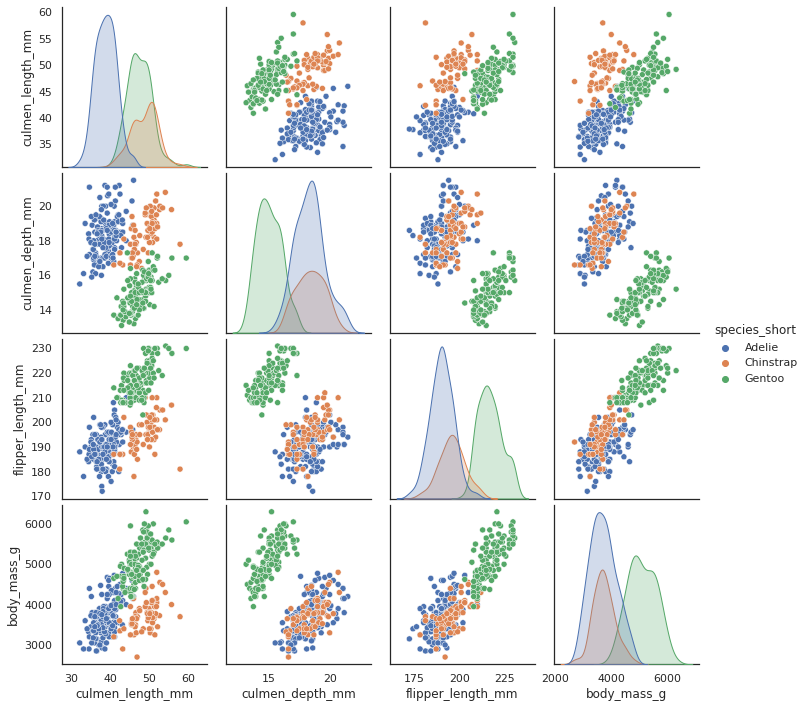

In [ ]:
sns.pairplot(dados, hue='species_short')

In [ ]:
!pip install umap-learpip uninstall umap
!pip install umap-learn

ERROR: Could not find a version that satisfies the requirement umap-learpip (from versions: none)
ERROR: No matching distribution found for umap-learpip


In [ ]:
import umap.umap_ as umap

In [ ]:
reducao = umap.UMAP()
reducao

UMAP(a=None, angular_rp_forest=False, b=None, dens_frac=0.0, dens_lambda=0.0,
     dens_var_shift=0.1, densmap=False, disconnection_distance=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=True, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None, n_jobs=-1,
     n_neighbors=15, negative_sample_rate=5, output_dens=False,
     output_metric='euclidean', output_metric_kwds=None, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None, ...)

In [ ]:
df = dados[["culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g"]].values
df_escalado = StandardScaler().fit_transform(df)

In [ ]:
df_escalado

array([[-0.89765322,  0.78348666, -1.42952144, -0.57122888],
       [-0.82429023,  0.12189602, -1.07240838, -0.50901123],
       [-0.67756427,  0.42724555, -0.42960487, -1.19340546],
       ...,
       [ 1.17485108, -0.74326098,  1.49880565,  1.91747742],
       [ 0.22113229, -1.20128527,  0.78457953,  1.23308319],
       [ 1.08314735, -0.53969463,  0.85600214,  1.48195382]])

In [ ]:
embedding = reducao.fit_transform(df_escalado)
embedding.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(334, 2)

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

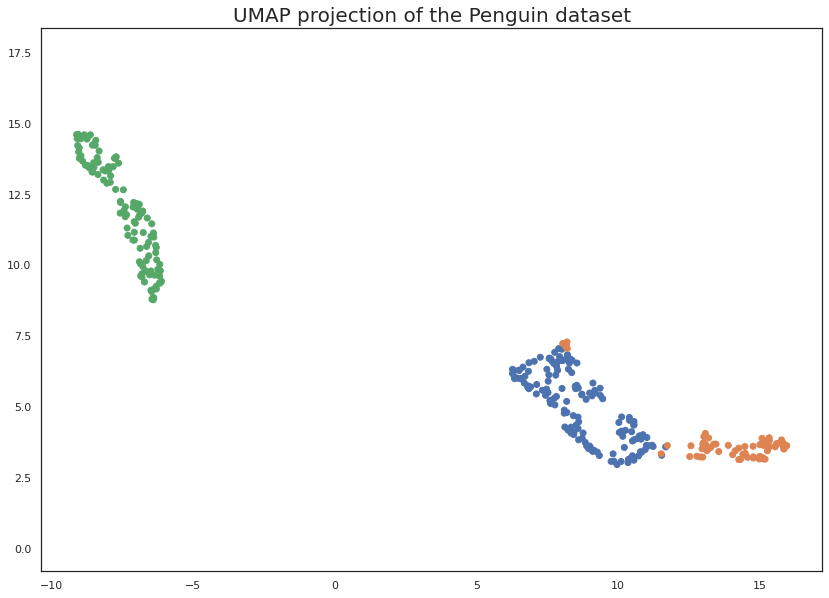

In [ ]:
plt.scatter(embedding[:, 0],
            embedding[:,1], c=[sns.color_palette()[x] for x in dados.species_short.map({"Adelie": 0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title("UMAP projection of the Penguin dataset", fontsize=20)